In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils, losses, optimizers, backend, models, optimizers
import matplotlib.pyplot as plt

In [5]:
batch_size = 100
num_classes = 10
epochs = 20
img_rows, img_cols = 28, 28

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

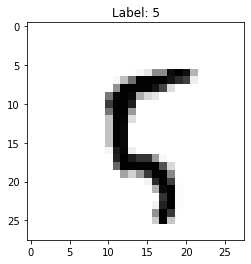

In [6]:
# # View image from dataset
image_index = 100# up to 59999
plt.title("Label: " + str(train_labels[image_index]))
plt.imshow(train_images[image_index], cmap='Greys')
plt.show()

In [7]:
if backend.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
    test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


# convert class vectors to binary class matrices
train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                162270    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 162,900
Trainable params: 162,900
Non-trainable params: 0
_________________________________________________________________


In [10]:
optimizer = optimizers.Adam(lr=0.0002)

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [11]:
hist = model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 360us/sample - loss: 0.5755 - accuracy: 0.8530 - val_loss: 0.2487 - val_accuracy: 0.9306
Epoch 2/20
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2171 - accuracy: 0.9381 - val_loss: 0.1741 - val_accuracy: 0.9494
Epoch 3/20
60000/60000 [==============================] - 14s 233us/sample - loss: 0.1566 - accuracy: 0.9561 - val_loss: 0.1353 - val_accuracy: 0.9606
Epoch 4/20
60000/60000 [==============================] - 13s 216us/sample - loss: 0.1228 - accuracy: 0.9659 - val_loss: 0.1054 - val_accuracy: 0.9695
Epoch 5/20
60000/60000 [==============================] - 11s 187us/sample - loss: 0.1015 - accuracy: 0.9719 - val_loss: 0.0896 - val_accuracy: 0.9741
Epoch 6/20
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0868 - accuracy: 0.9758 - val_loss: 0.0846 - val_accuracy: 0.9748
Epoch 7/20
60000/60000 [====================

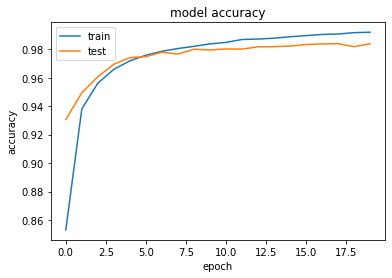

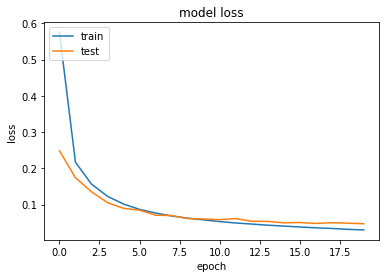

Test loss: 0.04707921135169454
Test accuracy: 0.9839


In [12]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Predicted: 3


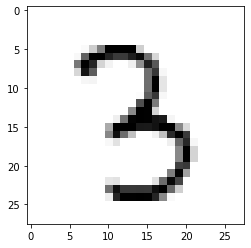

In [17]:
import numpy as np

index = 1020

predictions = model.predict([test_images])

print("Predicted:", np.argmax(predictions[index]))

plt.imshow(test_images[index].reshape(28,28), cmap='Greys')
plt.show()